In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

main_experiments_path = "../experiments"


basic_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp_0.01",
    "mlp_0.001",
    "mlp_0.0001",
    "rbf_full_0.01",
    "rbf_full_0.001",
    "rbf_full_0.0001",
    "rbf_diag_0.01",
    "rbf_diag_0.001",
    "rbf_diag_0.0001",
    "rbf_scal_0.01",
    "rbf_scal_0.001",
    "rbf_scal_0.0001",
    "rbf_univ_0.01",
    "rbf_univ_0.001",
    "rbf_univ_0.0001",
    "ffn_0.1_0.01",
    "ffn_0.1_0.001",
    "ffn_0.1_0.0001",
    "ffn_1_0.01",
    "ffn_1_0.001",
    "ffn_1_0.0001",
    "ffn_10_0.01",
    "ffn_10_0.001",
    "ffn_10_0.0001",
    "uffn_0.1_0.01",
    "uffn_0.1_0.001",
    "uffn_0.1_0.0001",
    "uffn_1_0.01",
    "uffn_1_0.001",
    "uffn_1_0.0001",
    "uffn_10_0.01",
    "uffn_10_0.001",
    "uffn_10_0.0001",
]


basic_condensed_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp",
    "rbf_full",
    "rbf_diag",
    "rbf_scal",
    "rbf_univ",
    "ffn",
    "uffn",
]

method_names = []
condensed_method_names = []
for i in range(3):
    method_names += [str(i+1)+"_"+method for method in basic_method_names]
    condensed_method_names += [str(i+1)+"_"+method for method in basic_condensed_method_names]


experiments_df = pd.DataFrame()


method_settings = os.listdir(main_experiments_path)

# sort by name

method_settings = sorted(method_settings)

#print all folders in the main experiments path
for method_setting in method_settings:
    #print(method_setting)
    # iterate over repetitions

    experiment_df = pd.DataFrame()

    if method_setting.startswith("."):
        continue

    for repetition in os.listdir(main_experiments_path + "/" + method_setting):
        #print(repetition)
        # iterate over files

        if repetition.startswith("."):
            continue

        ## add this repetition to the experiment df as column
        experiment_df[repetition] = None

        try:
            ## read the npy file
            train_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition + "/data/" + "train_loss.npy")
            val_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition +  "/data/"  + "val_loss.npy")
            test_loss = np.load(main_experiments_path + "/" + method_setting + "/" + repetition + "/data/" + "test_loss.npy")
        except Exception as e:
            print("Error reading files for dataset: ", method_setting, e)
            continue
        
        ### extract the min val loss and pick the corresponding test loss

        min_val_loss = np.min(val_loss)
        min_val_loss_index = np.argmin(val_loss)

        min_test_loss = test_loss[min_val_loss_index]

    
        ## add the test loss to the experiment df
        experiment_df.loc["data",repetition] = min_test_loss

    print(experiment_df)

    ## order by dataset name
    experiment_df = experiment_df.sort_index()

    ## add a column which represents the mean of all repetitions
    experiment_df["mean"] = experiment_df.mean(axis=1)

    ## set mean to nan if there are any nans in the row
    experiment_df.loc[experiment_df.isnull().any(axis=1), "mean"] = np.nan

    ## add the experiment df to the experiments df
    experiments_df[method_setting] = experiment_df["mean"]


for i, method_name in enumerate(method_names):
    ## rename column experiment_000001 to method_names[0]
    exp_name = "experiment_" + str(i+1).zfill(6)
    experiments_df = experiments_df.rename(columns={exp_name: method_name})

experiments_df



     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data      13555.637034       4605.532601       3790.719111       6660.211855   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       4309.204034       7987.193245      10907.805137        554.126114  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data      12273.384886        2741.29982       2046.228169       3146.802883   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       5196.916367       6370.279591        7909.16343       1028.979441  
     repetition_000003 repetition_000004 repetition_000005 repetition_000002  \
data       2630.211418       2059.629395       1015.618498        5986.99123   

     repetition_000007 repetition_000000 repetition_000001 repetition_000006  
data       3589.697809       4441.849388       9577.630307       1091.060326  
     repetition_000003 repetition_000004 re

/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_54652/4279503398.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_54652/4279503398.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  experiments_df[method_setting] = experiment_df["mean"]
/var/folders/vx/2hn3fq3j01ndcrt24ck57sr80000gn/T/ipykernel_54652/4279503398.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

,1_svr,1_pls,1_gradboost,1_mlp_0.01,1_mlp_0.001,1_mlp_0.0001,1_rbf_full_0.01,1_rbf_full_0.001,1_rbf_full_0.0001,1_rbf_diag_0.01,...,3_ffn_10_0.0001,3_uffn_0.1_0.01,3_uffn_0.1_0.001,3_uffn_0.1_0.0001,3_uffn_1_0.01,3_uffn_1_0.001,3_uffn_1_0.0001,3_uffn_10_0.01,3_uffn_10_0.001,3_uffn_10_0.0001
data,6546.303641,5089.131823,3799.086046,3652.012344,4110.631271,5044.014847,3148.758636,3205.35096,4805.737869,3148.758636,...,4116.446695,3644.58786,3231.743526,3883.41506,475.620199,529.628584,1483.964531,1424.710152,1419.612059,2901.79057


In [2]:
condensed_experiments_df = pd.DataFrame()

## iterate over the condensed method names and pick the min test loss for the corresponding methods 
for condensed_method in condensed_method_names:
    condensed_experiments_df[condensed_method] = experiments_df[[method for method in method_names if method.startswith(condensed_method)]].min(axis=1)

## set all None to nan
condensed_experiments_df = condensed_experiments_df.replace({None: np.nan})



### restructuring the dataframe to have the method names as columns and the indices as the rows the indices is the first part of the method name

condensed_experiments_df = condensed_experiments_df.T

condensed_experiments_df = condensed_experiments_df.reset_index()

condensed_experiments_df["method"] = condensed_experiments_df["index"].apply(lambda x: "_".join(x.split("_")[1:]))
condensed_experiments_df["index"] = condensed_experiments_df["index"].apply(lambda x: x.split("_")[0])


## plot the index as the rows and method as the columns

condensed_experiments_df = condensed_experiments_df.pivot(index="index", columns="method")

## drop the index

condensed_experiments_df.columns = condensed_experiments_df.columns.droplevel(0)


condensed_experiments_df

method,ffn,gradboost,mlp,pls,rbf_diag,rbf_full,rbf_scal,rbf_univ,svr,uffn
index,,,,,,,,,,
1,2274.185638,3799.086046,3652.012344,5089.131823,3148.758636,3148.758636,3149.121662,1629.687862,6546.303641,2274.185638
2,68.532252,556.833245,353.342649,1350.166613,141.185256,141.185256,118.389984,36.099507,1315.231675,112.703402
3,245.191190,240.851420,1339.416616,315.133480,425.233114,426.101830,479.107104,214.771546,291.660303,475.620199


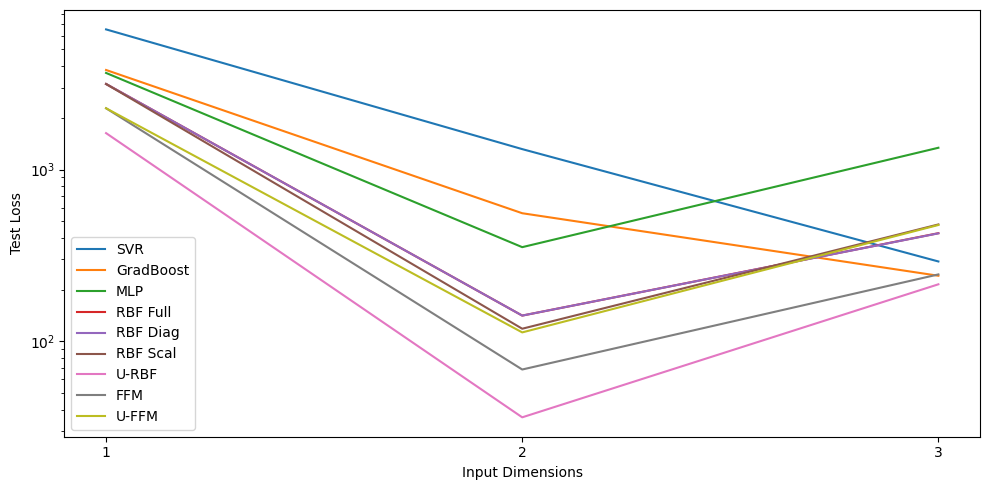

method,SVR,GradBoost,MLP,RBF Full,RBF Diag,RBF Scal,U-RBF,FFM,U-FFM
index,,,,,,,,,
1,6546.303641,3799.086046,3652.012344,3148.758636,3148.758636,3149.121662,1629.687862,2274.185638,2274.185638
2,1315.231675,556.833245,353.342649,141.185256,141.185256,118.389984,36.099507,68.532252,112.703402
3,291.660303,240.851420,1339.416616,426.101830,425.233114,479.107104,214.771546,245.191190,475.620199


In [4]:

renamed_experiments_df = condensed_experiments_df.copy()

method_renaming = {
    "svr": "SVR",
    #"pls": "PLS",
    "gradboost": "GradBoost",
    "mlp": "MLP",
    "rbf_full": "RBF Full",
    "rbf_diag": "RBF Diag",
    "rbf_scal": "RBF Scal",
    "rbf_univ": "U-RBF",
    "ffn": "FFM",
    "uffn": "U-FFM",
}

## rename the methods and exclude methods whose names are not in the method_renaming dict

renamed_experiments_df = renamed_experiments_df.rename(columns=method_renaming)
renamed_experiments_df = renamed_experiments_df[method_renaming.values()]


## plot the results in a line plot

plt.figure(figsize=(10,5))
plt.plot(renamed_experiments_df)
plt.legend(renamed_experiments_df.columns)
plt.xlabel("Input Dimensions")
plt.ylabel("Test Loss")

# scale the y-axis to log

plt.yscale("log")

plt.tight_layout()
plt.show()


renamed_experiments_df